In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("EDAData.csv")

In [4]:
# Drop Extra Column in Data
df = df.drop(columns="Unnamed: 0")

In [11]:
dfprice = df[df["Price"] >= 7.99]

In [7]:
sns.set_style("darkgrid")

In [ ]:
dfprice.Price = dfprice["Price"].round(2)

In [ ]:
dfprice["Price Bins"] = pd.cut(dfprice.Price, 5)

In [ ]:
unitygroup = dfprice[dfprice["Engine"] == "Unity Engine"].groupby("Price Bins").median()
unrealgroup = dfprice[dfprice["Engine"] == "Unreal Engine"].groupby("Price Bins").median()
unitygroup["Engine"] = "Unity"
unrealgroup["Engine"] = "Unreal"
finalgroup = pd.concat([unitygroup, unrealgroup])

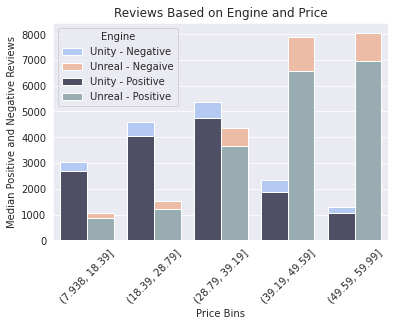

In [125]:
sns.barplot(data=finalgroup, x=finalgroup.index, y=finalgroup["Positive Reviews"] + finalgroup["Negative Reviews"], hue="Engine", palette="coolwarm", ci=None)
sns.barplot(data=finalgroup, x=finalgroup.index, y=finalgroup["Positive Reviews"], hue="Engine", palette="bone", ci=None)
plt.xticks(rotation=45)
plt.ylabel("Median Positive and Negative Reviews")
plt.title("Reviews Based on Engine and Price")
plt.legend(title='Engine', loc='upper left', labels=['Unity - Negative', 'Unreal - Negaive', 'Unity - Positive', 'Unreal - Positive'])
plt.show()
